# Importing Libraries and Packages

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Importing Dataset

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/Abhilakshya627/Phising-Website-Detection/refs/heads/main/Dataset/archive/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,...,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,...,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,...,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


# Preprocessing: Encode target labels and split the data
# Dropping the 'url' column as it likely doesn't provide useful information for training

In [33]:
X = df.drop(columns=['url', 'status'])
y = LabelEncoder().fit_transform(df['status'])  # Encode 'legitimate' as 0, 'phishing' as 1
y

array([0, 1, 1, ..., 0, 0, 1])

# Spliting Data

In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy of RFC: 0.968503937007874
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Confusion Matrix:
 [[1127   30]
 [  42 1087]]


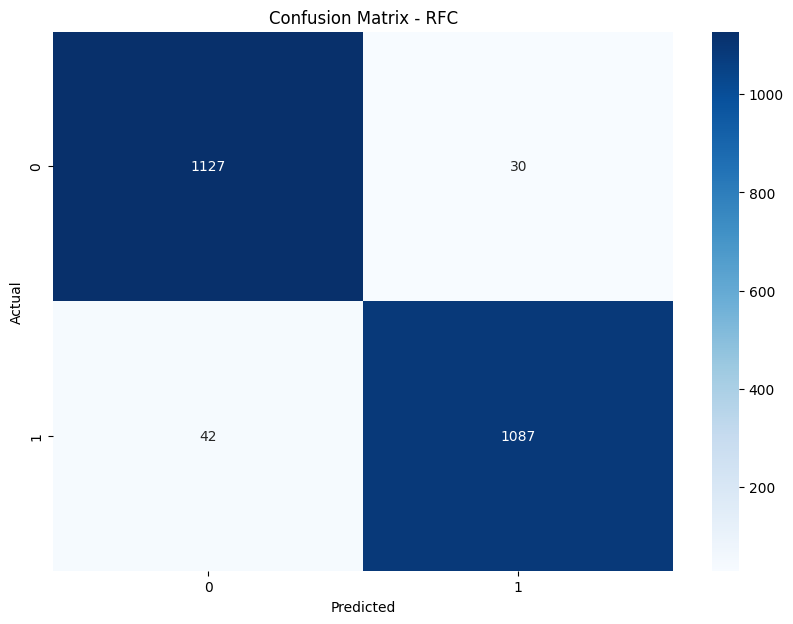

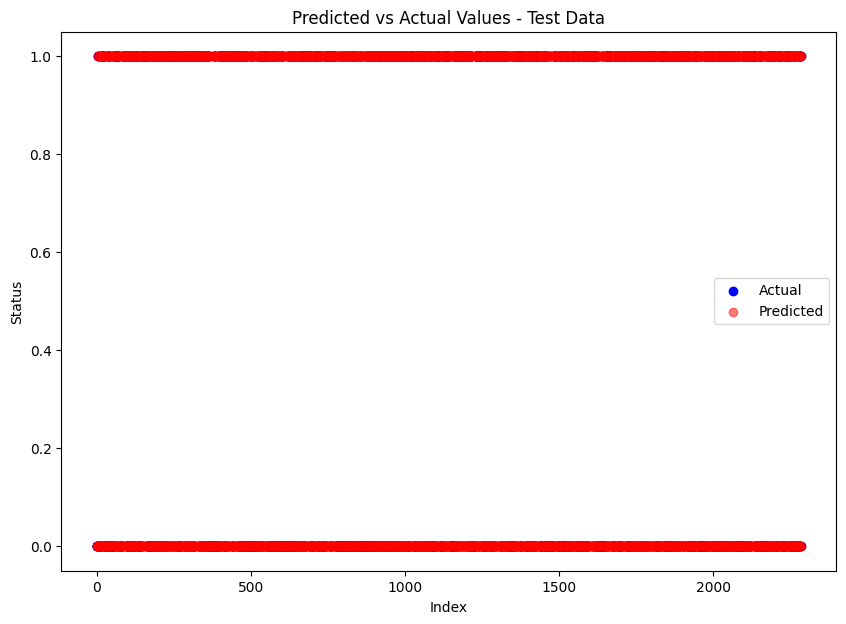

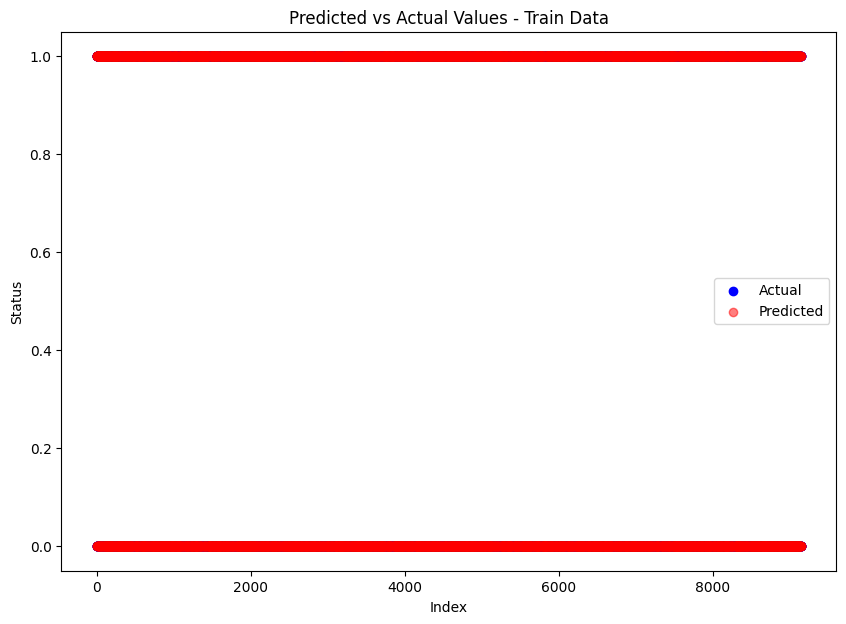

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

import matplotlib.pyplot as plt

y_test_pred_rfc=rfc.predict(X_test)

accuracy_rfc=accuracy_score(y_test,y_test_pred_rfc)
print(f'Accuracy of RFC: {accuracy_rfc}')


report_rfc = classification_report(y_test, y_test_pred_rfc)
print('Classification Report:\n', report_rfc)

conf_matrix_rfc = confusion_matrix(y_test, y_test_pred_rfc)
print('Confusion Matrix:\n', conf_matrix_rfc) 


'''
# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM: {accuracy_svm}')

# Generate classification report
report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report:\n', report_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:\n', conf_matrix_svm) '''

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RFC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot predicted vs actual values for test data
plt.figure(figsize=(10, 7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test_pred_rfc)), y_test_pred_rfc, color='red', label='Predicted', alpha=0.5)
plt.title('Predicted vs Actual Values - Test Data')
plt.xlabel('Index')
plt.ylabel('Status')
plt.legend()
plt.show()

# Predict the labels for the train set
y_train_pred_rfc = rfc.predict(X_train)

# Plot predicted vs actual values for train data
plt.figure(figsize=(10, 7))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual' )
plt.scatter(range(len(y_train_pred_rfc)), y_train_pred_rfc, color='red', label='Predicted', alpha=0.5)
plt.title('Predicted vs Actual Values - Train Data')
plt.xlabel('Index')
plt.ylabel('Status')
plt.legend()
plt.show()